In [1]:
%matplotlib inline

from __future__ import print_function
import avltree_eaf3d as bst
import eaf3D
import numpy as np
import pandas as pd
import seaborn
from copy import deepcopy
from glob import glob
from matplotlib import pyplot, ticker
from operator import attrgetter
from stack import Stack

In [2]:
folder = 'example/'
sets = eaf3D.retrieve_input_sequences(folder)
eaf_maker = eaf3D.EAF_3D(sets)
eaf_maker.transform()

solution is dominated [3 22.59977497 6131.390854]
solution is dominated [4 15.41832813 6131.390854]


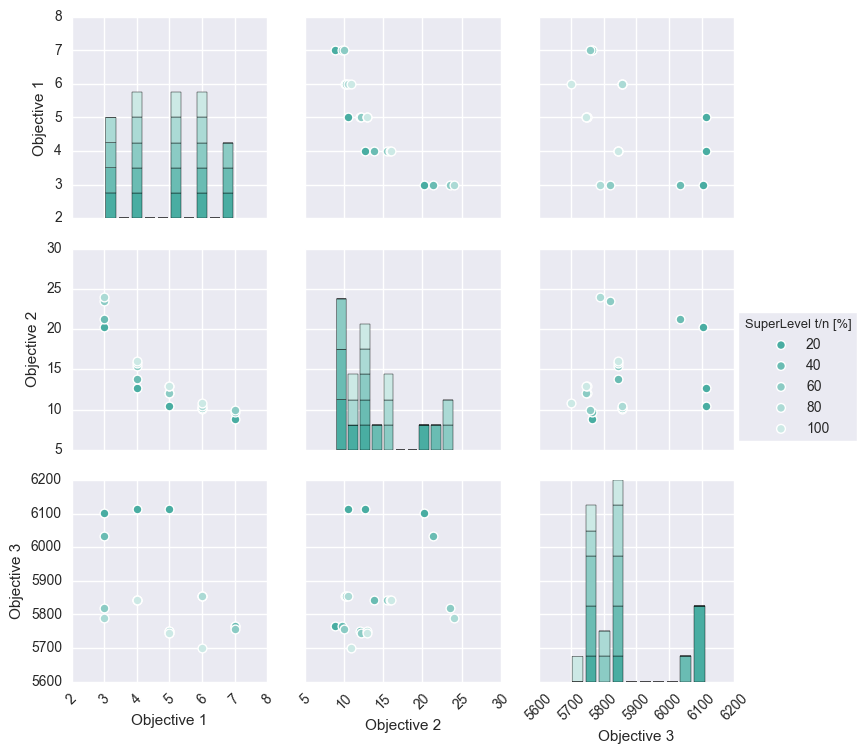

In [3]:
# Set environment for graphs
colors = ['#49ADA2', '#7797F4', '#C973F4', '#EF6E8B', '#FFAA6C']
superlevels = list(range(eaf_maker.n))
opcat = ['Objective 1', 'Objective 2', 'Objective 3']
plotname = 'eaf_ScatterMatrix'
df_lsa = eaf_maker.make_lsa_dataframe()
pal = seaborn.light_palette(colors[0], reverse=True)
scat = seaborn.PairGrid(df_lsa, vars=opcat, hue='SuperLevel t/n [%]', palette=pal)
scat = scat.map_diag(pyplot.hist)
scat = scat.map_offdiag(pyplot.scatter, linewidths=1, edgecolor="w", s=40)
# Set the tick labels to be at a 45 degree angle for better fit
for ax in scat.axes.flat:
    ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda xax, p: format(int(xax))))
    pyplot.setp(ax.get_xticklabels(), rotation=45)
scat.add_legend(frameon=True)
# scat.fig.get_children()[-1].set_bbox_to_anchor((0.995, 0.89, 0, 0))
plotname = 'eaf_ScatterMatrix'
pyplot.savefig(plotname + '.eps', format='eps', dpi=4000)
pyplot.savefig(plotname + '.pdf', format='pdf', dpi=4000)